In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

12812


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt


In [4]:
from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width, _double_col_width

In [5]:
#figure_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear' # from shiwei
figure_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817'
print(figure_folder)
dark = False
if dark:
    merfish_figure_folder = os.path.join(figure_folder, 'MERFISH', 'dark')
    plt.style.use('dark')
else:
    merfish_figure_folder = os.path.join(figure_folder, 'MERFISH', 'light')
    plt.style.use('default')

if not os.path.exists(merfish_figure_folder):
    print(f"Create: {merfish_figure_folder}")
    os.makedirs(merfish_figure_folder)
else:
    print(f"Use: {merfish_figure_folder}")
    
sc.settings.n_jobs = 44
sc.settings.set_figure_params(dpi=150, dpi_save=300, frameon=False, 
                              figsize=(_single_col_width,_single_col_width), 
                              fontsize=_font_size, facecolor='white', transparent=True)
sc.settings.figdir = merfish_figure_folder

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\MERFISH\light


# Load data

In [6]:
save_folder = r'\\crick\SSD_0\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
merged_adata = sc.read(os.path.join(save_folder,'new_labeled_data.h5ad'))

In [7]:
adata_ori = merged_adata.raw.to_adata()
adata_ori

AnnData object with n_obs × n_vars = 62732 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_subclass', 'subclass_prediction_label', 'leiden_subclass_sub', 'subclass_manual_label', 'subclass_manual_label_predict', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'dendrogram_subclass_label_new', 'experiment_colors', 'leiden', 'leiden_colors', 'leiden_subclass_colors', 'leiden_subclass_sub_colors', 'neighbors', 'pca', 'scrublet', 'subclass_label_new_colors', 'subclass_manual_label_colors', 'subclass_prediction_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
cmap_subclass = {    
    'L2/3 IT': '#E6E650',
    'L4/5 IT': '#da8046',
    'L5 IT': '#1CE6FF',
    'L6 IT': '#FF00FF',
    'L6 IT Car3': '#5100FF',
    'L5 ET': '#008941',
    'L5/6 NP': '#006FA6',
    'L6 CT': '#A30059',
    'L6b': '#0000ff',
    'Lamp5': '#7A4900',
    'Sncg': '#0000A6',
    'Vip': '#63FFAC',
    'Sst': '#B79762',
    'Pvalb': '#004D43', 
    'Sst Chodl':'#997D87',
    'Astro':'#B05B6F',
    'Endo':'#8CD0FF',
    'PVM':'#04F757',
    'Micro':'#C8A1A1',
    'OPC':'#1E6E00',
    'Oligo':'#7900D7',
    'Peri':'#A77500',
    'SMC':'#6367A9',
    'VLMC':'#A05837',
    'other':'#6B002C'
    }

In [16]:
adata_ori.uns['subclass_label_new_colors'] = [cmap_subclass[_sub_cls] 
                                                 for _sub_cls in np.unique(adata_ori.obs['subclass_label_new'])]    

<IPython.core.display.Javascript object>


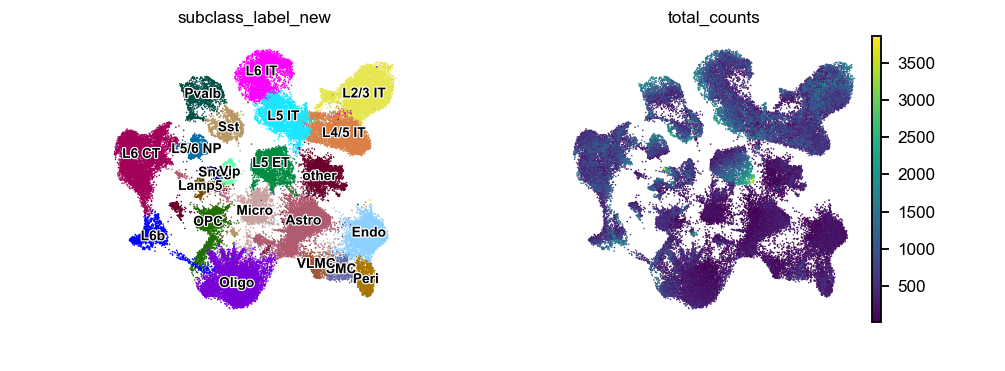

In [17]:
sc.pl.umap(adata_ori, color=['subclass_label_new', 'total_counts'], legend_loc='on data',
           legend_fontsize=6.,legend_fontoutline=1)
plt.show()

<IPython.core.display.Javascript object>


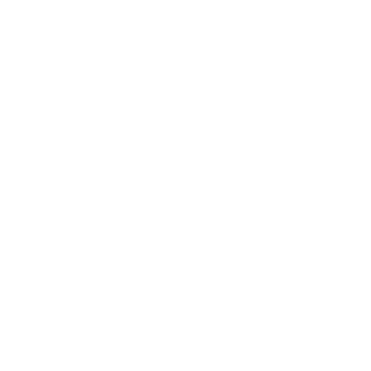

<IPython.core.display.Javascript object>


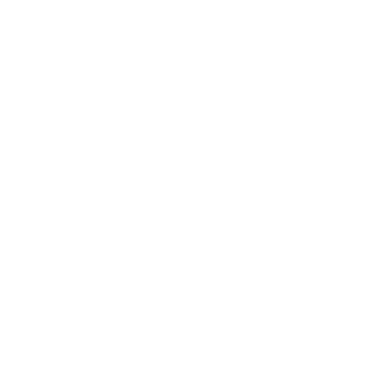

In [18]:
plt.figure()
sc.pl.umap(adata_ori, color='subclass_label_new', legend_loc='on data',
           legend_fontsize=6.,legend_fontoutline=1, save='_total_subclass.pdf')
plt.show()

In [19]:
experiments = np.unique(merged_adata.obs['experiment'])
print(experiments)

['20220304' '20220329' '20220415' '20220418']


<IPython.core.display.Javascript object>


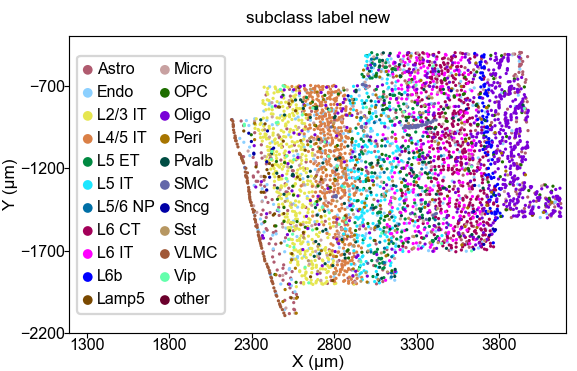

E:\Users\puzheng\AppData\anaconda3\envs\ia3_postanalysis\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [21]:
fig, ax = plt.subplots(figsize=(3.5,_single_col_width), dpi=150)

fig.subplots_adjust(left=0.12, right=0.98, bottom=0.1, top=0.9)

# select 
sel_exp_id = 2
adata_sub = merged_adata[merged_adata.obs['experiment'].isin([experiments[sel_exp_id]])]
adata_sub.uns['subclass_label_new_colors'] = [cmap_subclass[_sub_cls] 
                                                 for _sub_cls in np.unique(adata_sub.obs['subclass_label_new'])]    
sc.pl.scatter(adata_sub, x='center_x', y='center_y', color='subclass_label_new',
              size=8,
              ax=ax, 
              show=False)

ax.legend(ncol=2, loc=6, fontsize=_font_size, markerscale=3, 
          handletextpad=0.3, labelspacing=0.5, columnspacing=0.4, scatterpoints=1, prop={'size': 7})

plt.axis('equal')
ax.set_xlim([1300,4100])
ax.set_ylim([-2200, -400])

ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 500))
ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 500))

ax.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=1)
ax.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=1)
ax.grid(False)
ax.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in ax.spines.items()]




fig.savefig(os.path.join(merfish_figure_folder, f'celltype_scatter_all_exp-{experiments[sel_exp_id]}.pdf'), 
            dpi=300, transparent=True)
plt.show()